In [1]:
%matplotlib inline
from scipy import signal
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pylab as plt
import spectral

%reload_ext autoreload
%autoreload 1
%aimport spectral

In [40]:
data = io.loadmat('/Users/rgao/Documents/Data/CA1_Buzsaki/Raw/lfp_spiketimes_ec013.527.mat', squeeze_me=True)
x = data['data'][0]
fs = 1024

(1, 200.0)

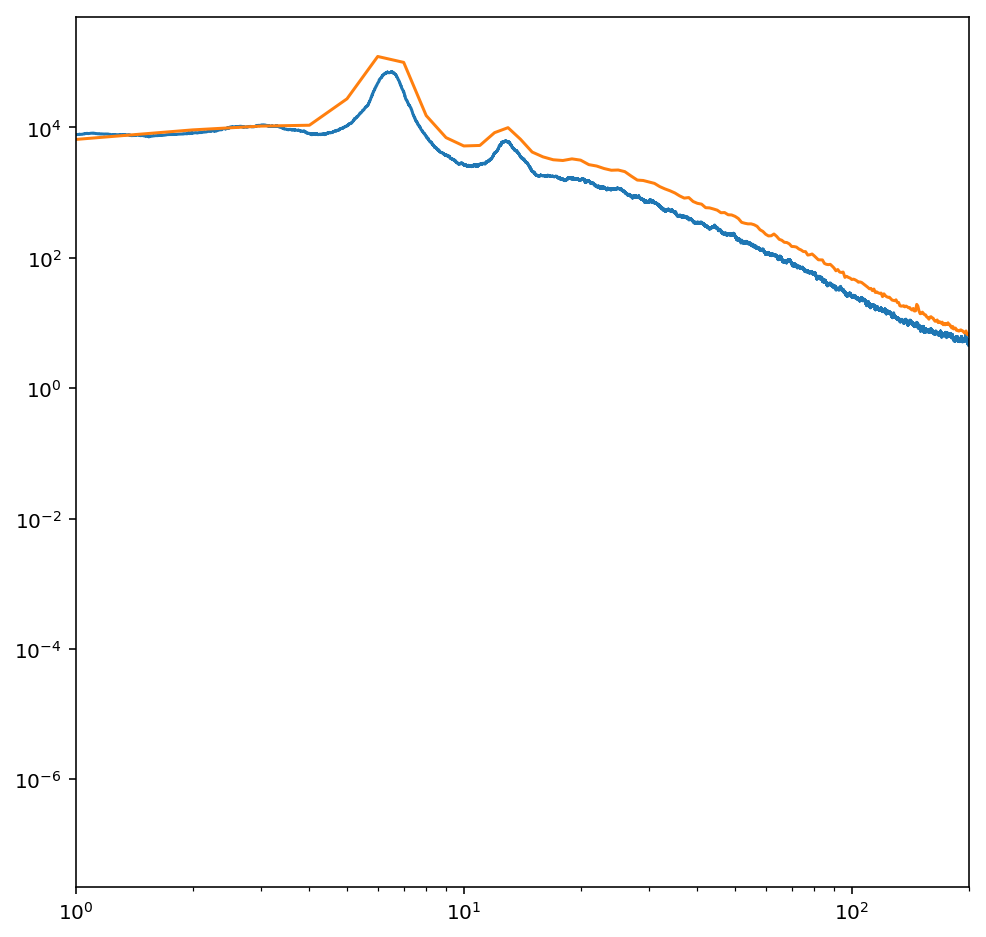

In [48]:
plt.figure(figsize=(8,8))
#freq, P = spectral.psd(x, fs, method='medfilt')
plt.loglog(freq,P)
freq2, P2 = spectral.psd(x, fs, method='median')
plt.loglog(freq2,P2)

#freq, P = signal.welch(x, fs, nperseg=fs)
#plt.loglog(freq,P)
plt.xlim([1, 200.])

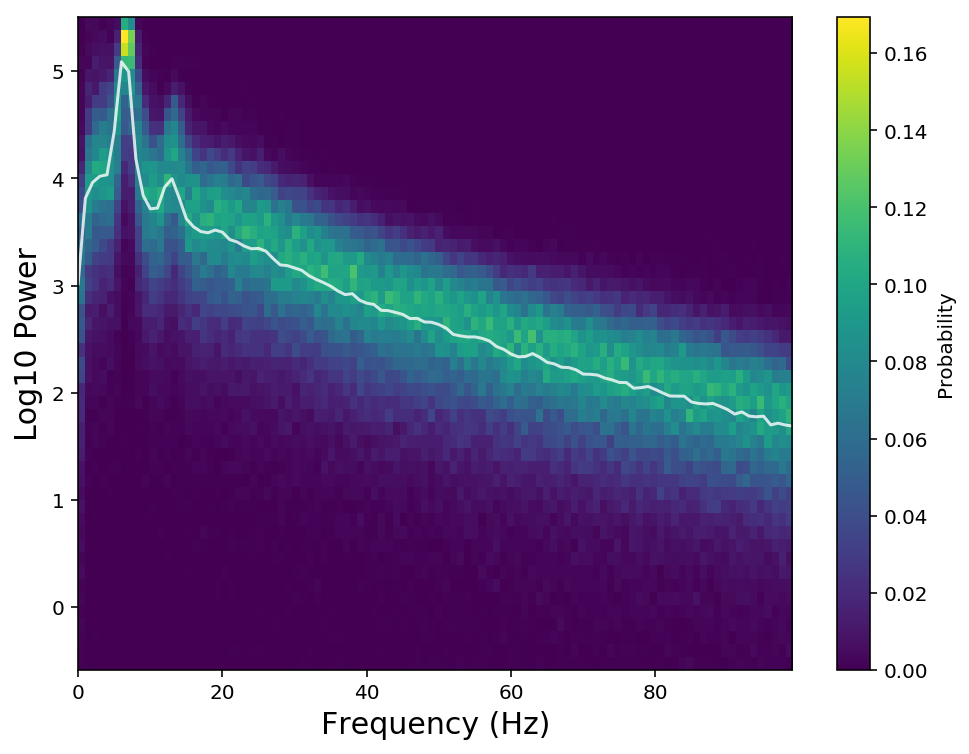

In [57]:
f, bins, spect_hist = spectral.spectral_hist(x, fs, nbins=50, flim=(0,100), cutpct=(0.1,99.9))
spectral.plot_spectral_hist(f, bins, spect_hist, freq2, P2)

(1.0, 200)

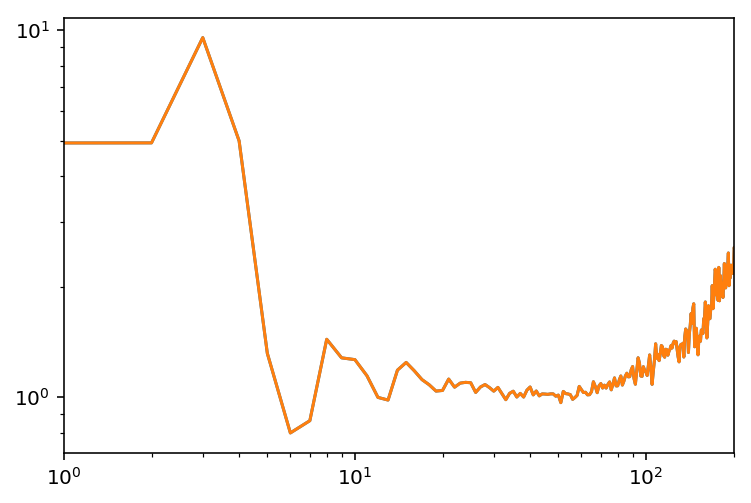

In [274]:
f, scv = spectral.scv(x, fs, nperseg=int(fs),noverlap=int(fs/2.))
plt.loglog(f,scv)
f, scv = spectral.scv(x, fs, nperseg=int(fs), noverlap=int(fs/2.))
plt.loglog(f,scv)
plt.xlim([0, 200])

(2.0, 200)

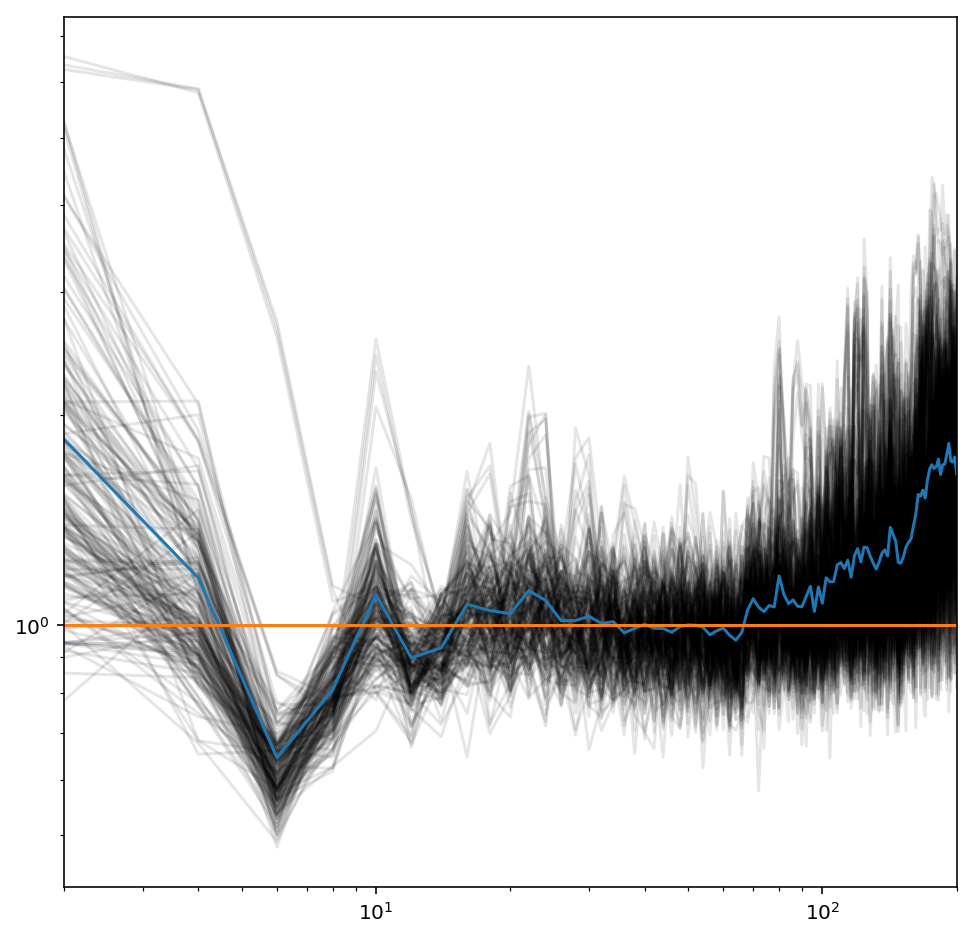

In [106]:
f, T, SCVrs = spectral.scv_rs(x, fs,nperseg=fs/2, method='bootstrap', rsParams=(50, 200))
plt.figure(figsize=(8,8))
plt.loglog(f, SCVrs, 'k', alpha=0.1);
plt.loglog(f, np.mean(SCVrs, axis=1))
plt.loglog(f, len(f)*[1.])
plt.xlim((0,200))

In [116]:
f, T, SCVrs = spectral.scv_rs(x, fs, method='rolling', rsParams=(10,2))

(200, 0)

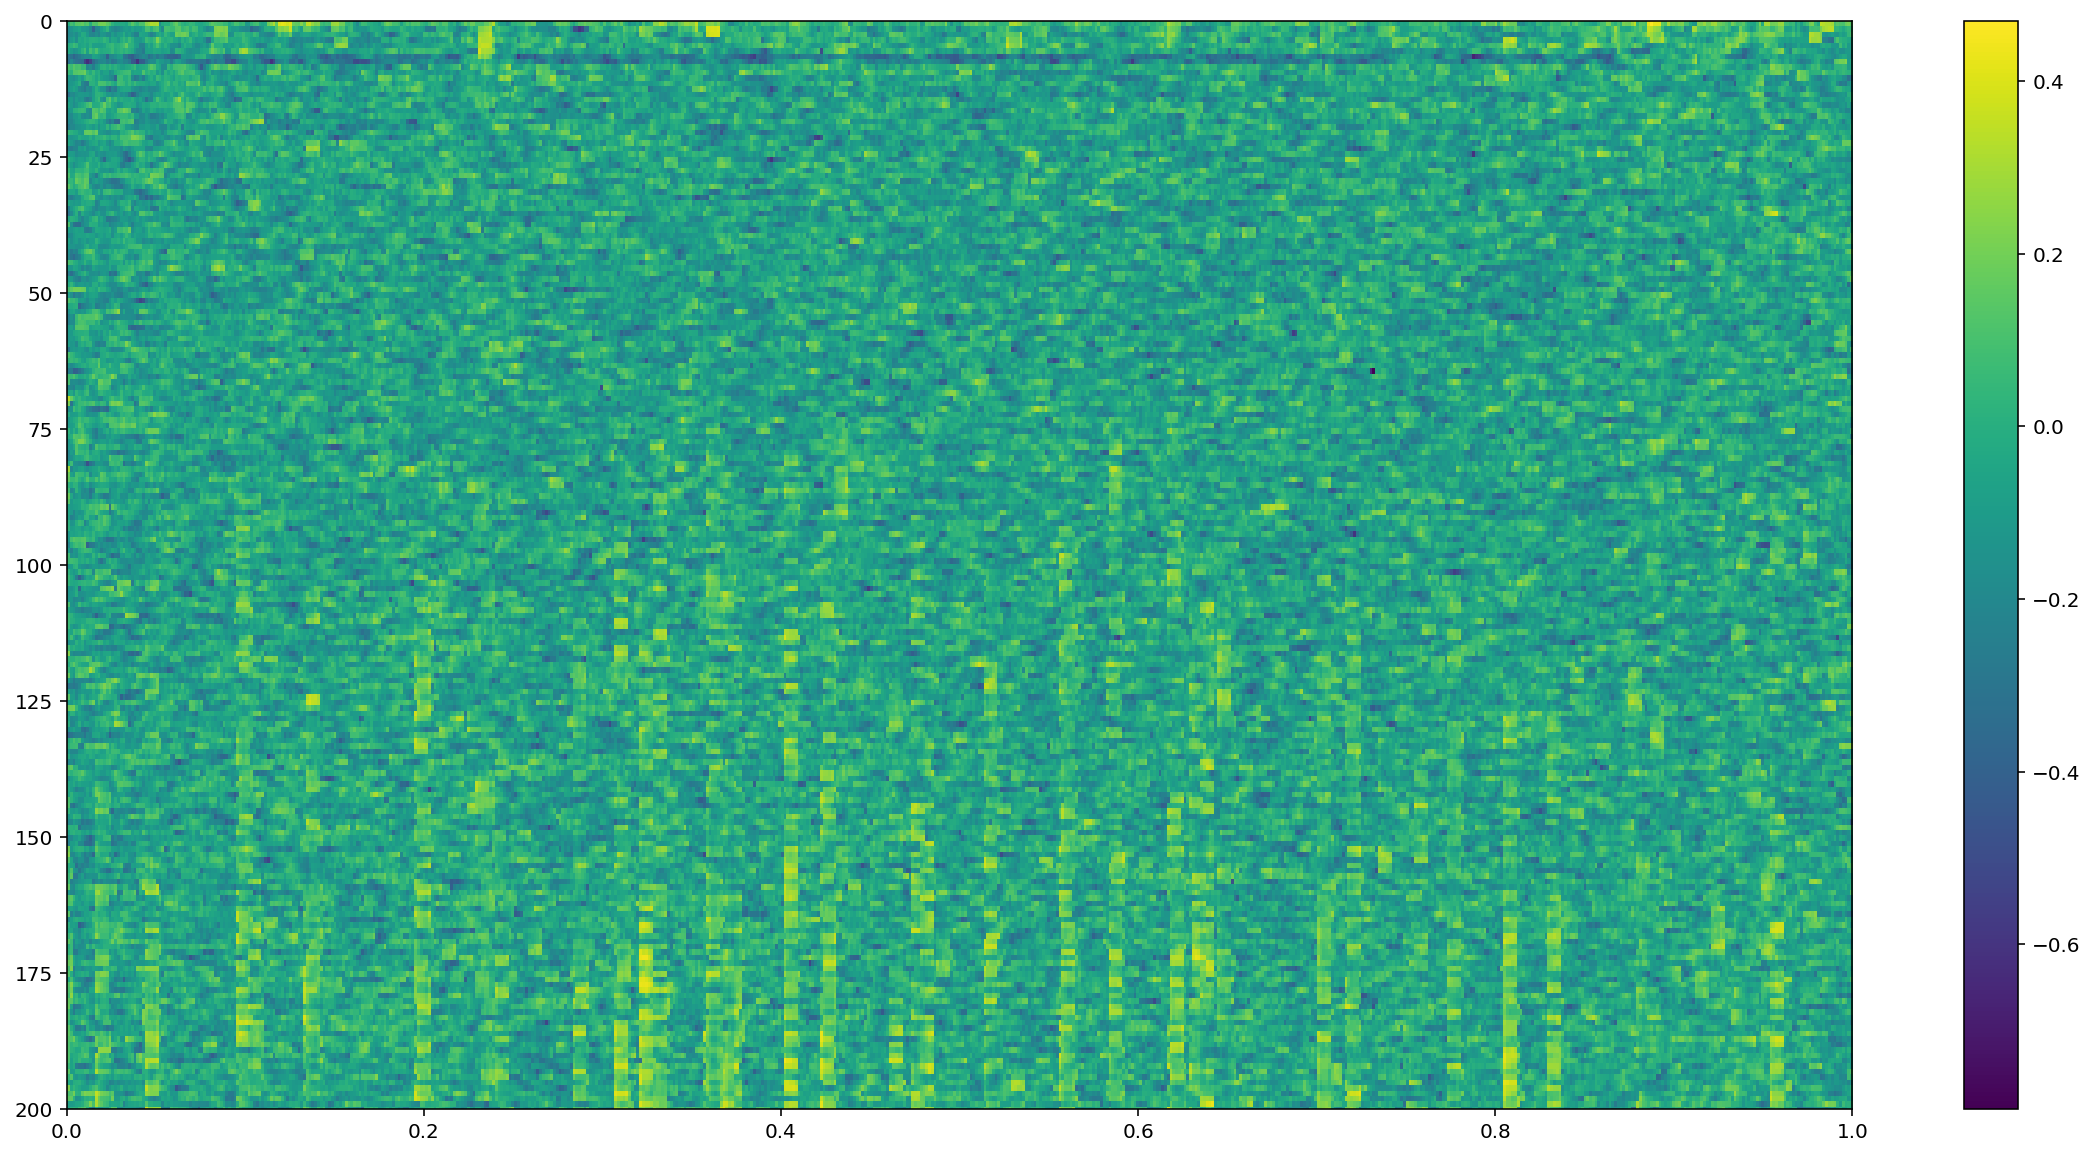

In [117]:
plt.figure(figsize=(20,10))
plt.imshow(np.log10(SCVrs), aspect='auto', extent=(0,1,f[-1],f[0]))
plt.colorbar()
plt.ylim((200,0))
# plt.loglog(SCVrs, 'k', alpha=0.1);
# plt.xlim((0,100))


(100, 0)

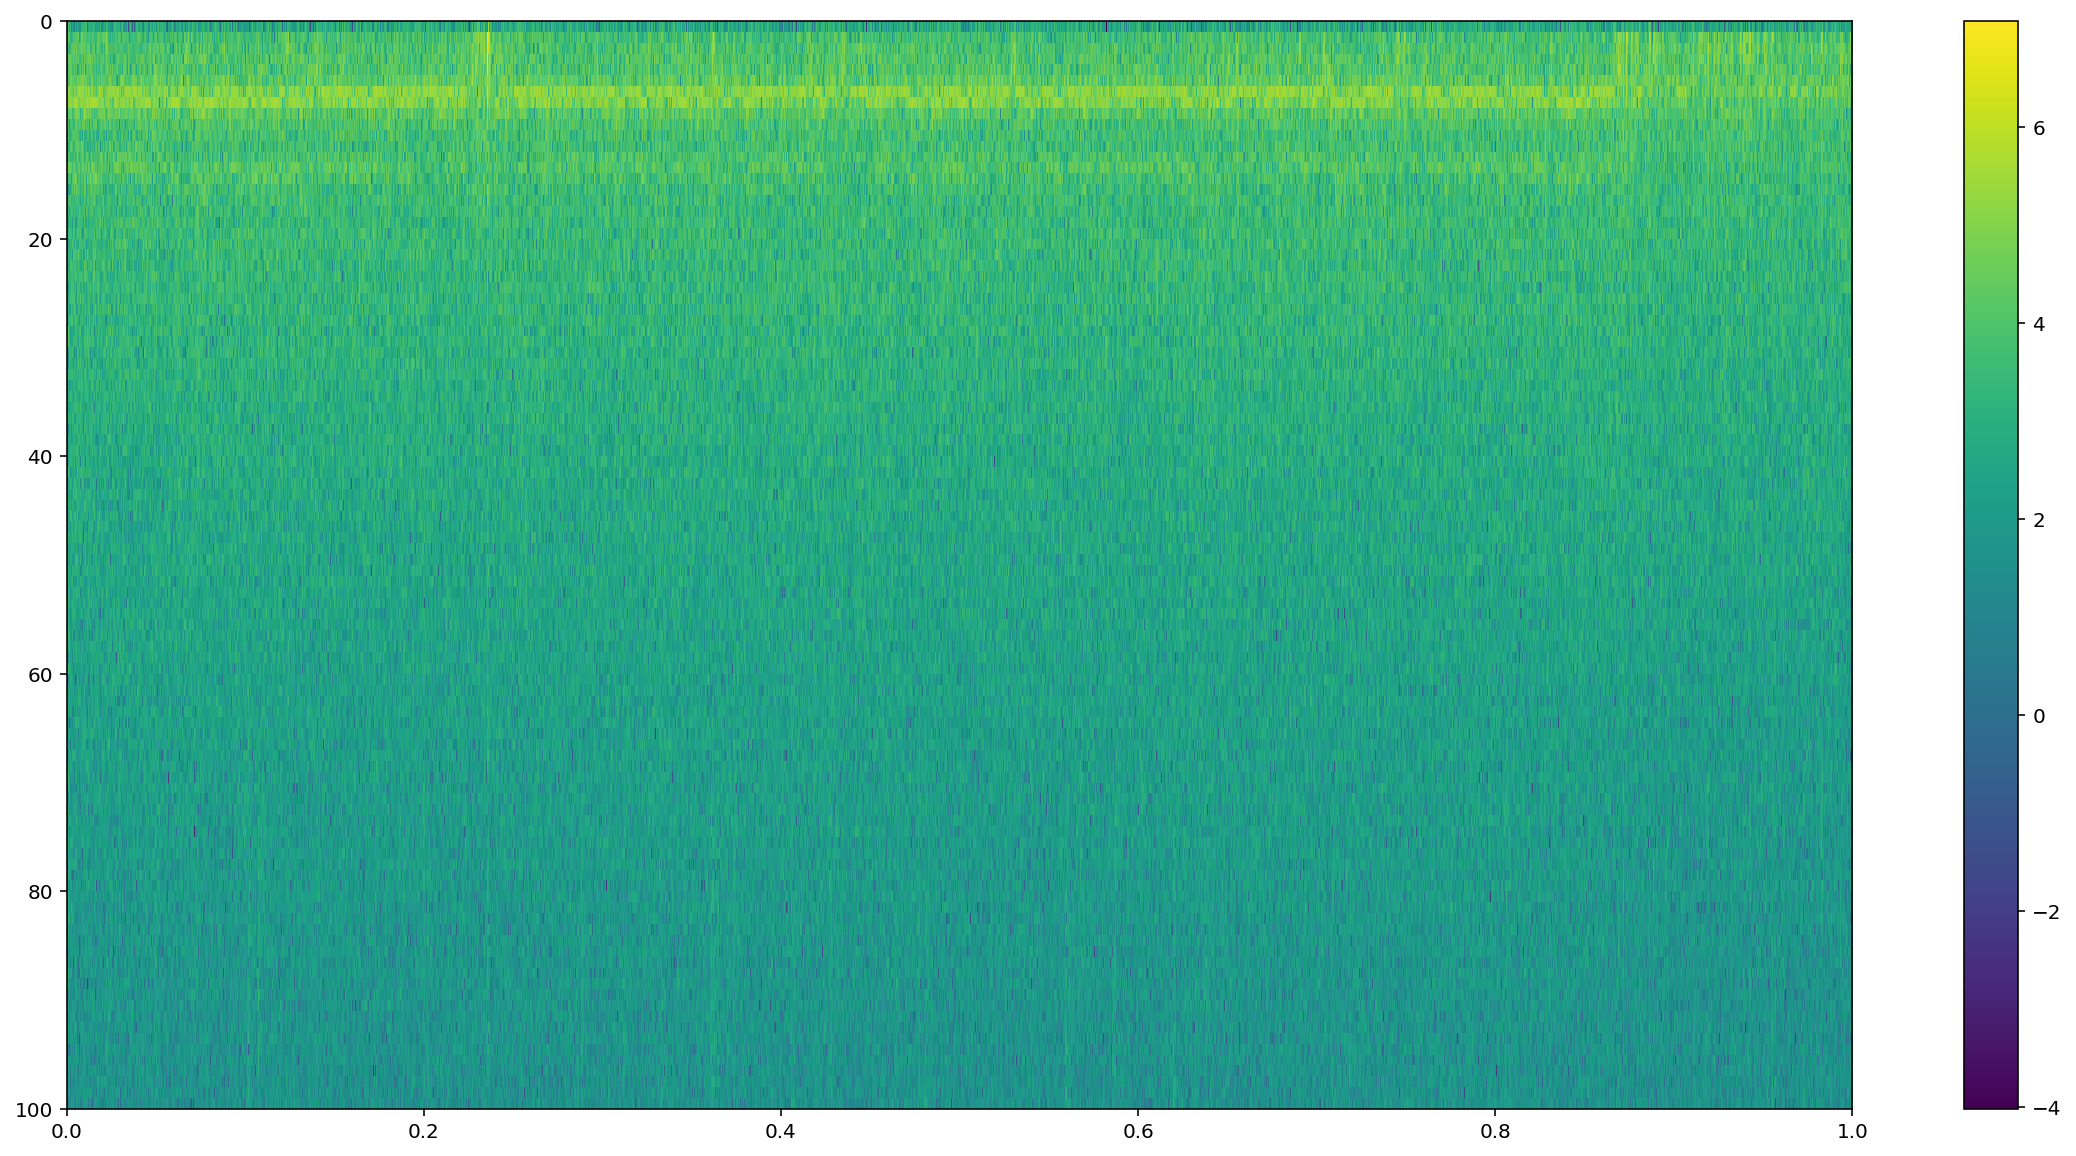

In [115]:
f,T,spg = signal.spectrogram(x,fs,nperseg=fs,noverlap=fs/2)
plt.figure(figsize=(20,10))
plt.imshow(np.log10(spg[:100,:]), aspect='auto', extent=(0,1,f[100],f[0]))
plt.colorbar()
plt.ylim((100,0))

### writing test cases

In [28]:
data = np.load('./tests/data/sample_data_1.npy')
fs = 1000.

In [35]:
# PSD
freq, Pmean = spectral.psd(data, fs, method='mean', nperseg=fs*2)
freq, Pmed = spectral.psd(data, fs, method='median', nperseg=fs*2)
freqmf, Pmedfilt = spectral.psd(data, fs, method='medfilt')
np.savez('./tests/data/sample_data_1_psd', PSDmean=Pmean, PSDmed=Pmed, PSDmedfilt=Pmedfilt, freq=freq, freqmf=freqmf)

In [36]:
# SCV
freq, SCV = spectral.scv(data, fs)
np.savez('./tests/data/sample_data_1_scv', freq=freq, SCV=SCV)

In [41]:
# SCV resampled
np.random.seed(99)
freqbs, Tbs, SCVrsbs = spectral.scv_rs(data, fs, method='bootstrap', rsParams=(5,20))
freqro, Tro, SCVrsro = spectral.scv_rs(data, fs, method='rolling', rsParams=(4,2))
np.savez('./tests/data/sample_data_1_scvrs', freqbs=freqbs, Tbs=Tbs, SCVrsbs=SCVrsbs, freqro=freqro, Tro=Tro, SCVrsro=SCVrsro)

In [42]:
# spectral histogram
freq, bins, sp_hist = spectral.spectral_hist(data, fs, nbins=10)
np.savez('./tests/data/sample_data_1_sphist', freq=freq, bins=bins, sp_hist = sp_hist)

In [45]:
!py.test

============================= test session starts ==============================
platform darwin -- Python 3.6.1, pytest-3.0.7, py-1.4.33, pluggy-0.4.0
rootdir: /Users/rgao/Documents/Code/research/neurodsp, inifile:
collected 17 items 

tests/test_cyclefeatures.py .
tests/test_cyclepoints.py ..
tests/test_filt.py ....
tests/test_laggedcoherence.py .
tests/test_shapephase.py .
tests/test_spectral.py ....
tests/test_swm.py .
tests/test_timefreq.py ...

========================== 17 passed in 2.72 seconds ===========================
